In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [3]:
# Create pandas DataFrame for features and pandas Series for target
x = pd.DataFrame(data.data, columns=[data.feature_names])
y = pd.Series(data.target)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=9)

In [6]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=2000, tol=0.01)
model.fit(x_train, y_train)

# Calculate the accuracy of the model on the test set
result = model.score(x_test, y_test)
print(f'Accuracy: {result}')

Accuracy: 0.9415204678362573


In [7]:
# Predict probabilities for each class on the test set
predicted_proba = model.predict_proba(x_test)
print(predicted_proba)

[[4.90565363e-02 9.50943464e-01]
 [4.98131196e-01 5.01868804e-01]
 [1.00000000e+00 9.51997853e-11]
 [3.62508365e-02 9.63749164e-01]
 [2.98618585e-03 9.97013814e-01]
 [1.00000000e+00 6.98723503e-12]
 [1.00000000e+00 1.55743999e-11]
 [9.99999503e-01 4.96982552e-07]
 [1.03182708e-02 9.89681729e-01]
 [9.99850301e-01 1.49698685e-04]
 [9.99999998e-01 2.10041836e-09]
 [1.37052108e-02 9.86294789e-01]
 [8.02968392e-04 9.99197032e-01]
 [3.01703945e-03 9.96982961e-01]
 [9.96008526e-01 3.99147372e-03]
 [1.03016454e-01 8.96983546e-01]
 [7.54421111e-04 9.99245579e-01]
 [7.22430117e-02 9.27756988e-01]
 [1.56342814e-04 9.99843657e-01]
 [6.04015436e-04 9.99395985e-01]
 [1.00000000e+00 5.17490304e-27]
 [9.54295066e-04 9.99045705e-01]
 [7.33555481e-03 9.92664445e-01]
 [9.99991005e-01 8.99467752e-06]
 [1.43230576e-02 9.85676942e-01]
 [3.38391649e-02 9.66160835e-01]
 [5.59208009e-02 9.44079199e-01]
 [3.84395813e-04 9.99615604e-01]
 [7.96230215e-03 9.92037698e-01]
 [9.99999996e-01 4.37858099e-09]
 [9.999999

In [8]:
import numpy as np

In [9]:
# Predict classes for the test set
predicted_class = model.predict(x_test)

# Create a DataFrame with predicted classes and probabilities
result_df = pd.DataFrame(np.column_stack((predicted_class, predicted_proba)), columns=["Predicted Class", "Probability for Class 0", "Probability for Class 1"])

print(result_df)

     Predicted Class  Probability for Class 0  Probability for Class 1
0                1.0                 0.049057             9.509435e-01
1                1.0                 0.498131             5.018688e-01
2                0.0                 1.000000             9.519979e-11
3                1.0                 0.036251             9.637492e-01
4                1.0                 0.002986             9.970138e-01
..               ...                      ...                      ...
166              0.0                 1.000000             8.045747e-14
167              1.0                 0.001311             9.986895e-01
168              1.0                 0.000743             9.992574e-01
169              1.0                 0.000057             9.999429e-01
170              1.0                 0.000634             9.993664e-01

[171 rows x 3 columns]


In [10]:
# Create a var with only first columns of predicted_proba 
probs = predicted_proba[:,1]

In [11]:
# Import the roc_curve
from sklearn.metrics import roc_curve

In [12]:

# Calculate the TPR, FPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

print(f'TPR: {tpr}. FPR: {fpr}. Thresholds: {thresholds}')

TPR: [0.         0.00917431 0.8440367  0.8440367  0.9266055  0.9266055
 0.96330275 0.96330275 0.97247706 0.97247706 0.98165138 0.98165138
 1.         1.        ]. FPR: [0.         0.         0.         0.01612903 0.01612903 0.03225806
 0.03225806 0.0483871  0.0483871  0.09677419 0.09677419 0.20967742
 0.20967742 1.        ]. Thresholds: [           inf 9.99942898e-01 9.53176727e-01 9.50943464e-01
 8.96983546e-01 8.94043738e-01 8.16631933e-01 7.80589463e-01
 7.18152489e-01 5.37289499e-01 5.24694390e-01 1.41703907e-01
 1.20929633e-01 3.29476689e-32]


In [13]:
import matplotlib.pyplot as plt

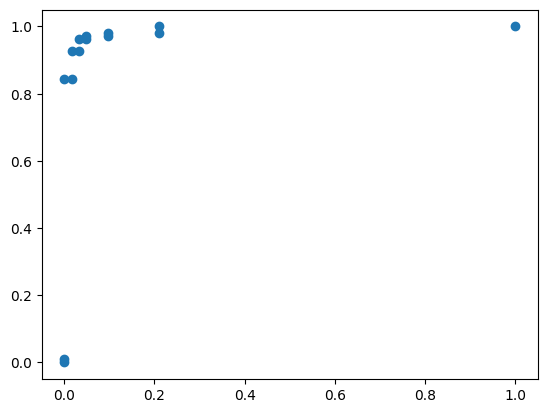

In [14]:
# Show data
plt.scatter(fpr, tpr)
plt.show()

In [15]:
# Import the roc_auc_
from sklearn.metrics import roc_auc_score

In [16]:
# show the auc score
print(roc_auc_score(y_test, probs))

0.9923054158034921
